# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

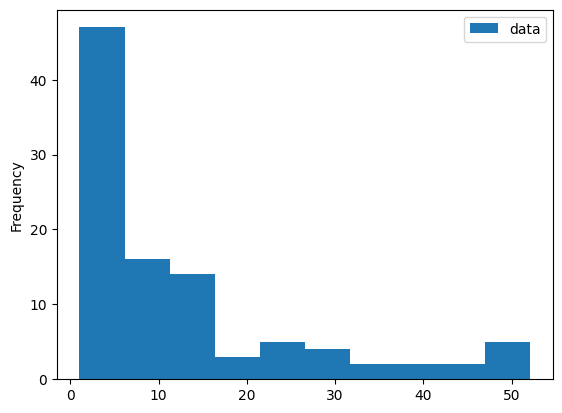

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

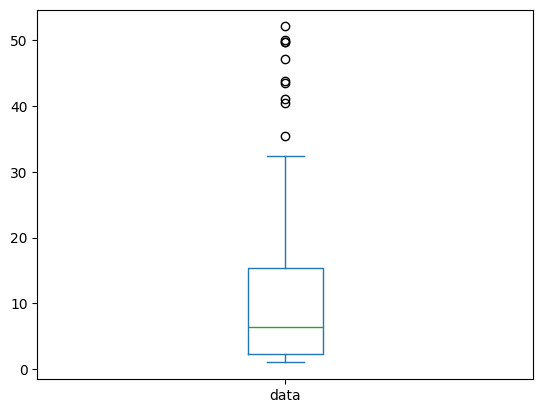

In [3]:
df.plot.box()

The histogram is useful for a quick visualization of the distribution of the frequency of price ranges. In other words, from just looking at the chart, it is easy to see what prices are most frequent and which are the least frequent for the cost of drugs. In addition, the chart allows for analysis of the shape of distributiuon (skewed right here) which provides information regarding how prices are clustered and makes it easier to identify outliers. However, the cons of a histogram is the information is not as specific, especially when compared to a boxplot. For instance, the histogram does not provide immediate stats like median, quartiles, or easy identification of outliers which makes analysis more difficult. In addition with lots of data points, like in this sample, the graph can become cluttered and may result in making it difficult to see meaningful patterns.

The box plot is designed to clearly show key stats like median, quartiles, and outliers which makes analysis easier and allows for more accurate insight into the data's central tendency and spread. A large benefit, specific to this example, is the outlier identification which is crucial in determining the prices of the more expensive drugs - the administrator's goal. The cons of a boxplot, however, is they do not provide insight into how prices are distributed within or between quartiles (i.e. unable to see clusters or patterns in the data). Specifically, the graphs provide more of a "summary" of the data and are less helpful with precision.

For this scenario of wanting to determining how much more expensive the more expensive drugs tend to cost, in the context of the other prices,
I would choose the boxplot. However, I would add labels to the x and y axis, add a title, and add labels to the boxplot so it would list the median, the quartile values, and the outlier values. These additions would help add context to the graph and make it easier for the administrators to reach their goal of determining the price differences between the drugs.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd

file_path = 'video_review.csv'

df = pd.read_csv(file_path)

print(df.head())


   Season_Year  GameKey  PlayID  GSISID Player_Activity_Derived  \
0         2016        5    3129   31057                Tackling   
1         2016       21    2587   29343                 Blocked   
2         2016       29     538   31023                Tackling   
3         2016       45    1212   33121                Tackling   
4         2016       54    1045   32444                 Blocked   

  Turnover_Related Primary_Impact_Type Primary_Partner_GSISID  \
0               No      Helmet-to-body                  32482   
1               No    Helmet-to-helmet                  31059   
2               No      Helmet-to-body                  31941   
3               No      Helmet-to-body                  28249   
4               No      Helmet-to-body                  31756   

  Primary_Partner_Activity_Derived Friendly_Fire  
0                          Tackled            No  
1                         Blocking            No  
2                          Tackled            No  
3 

/tmp/ipykernel_5438/480620663.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[idx, 1])
/tmp/ipykernel_5438/480620663.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[idx, 1])
/tmp/ipykernel_5438/480620663.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[idx, 1])
/tmp/ipykernel_5438/480620663.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=axes[idx, 1])
/tmp/ipy

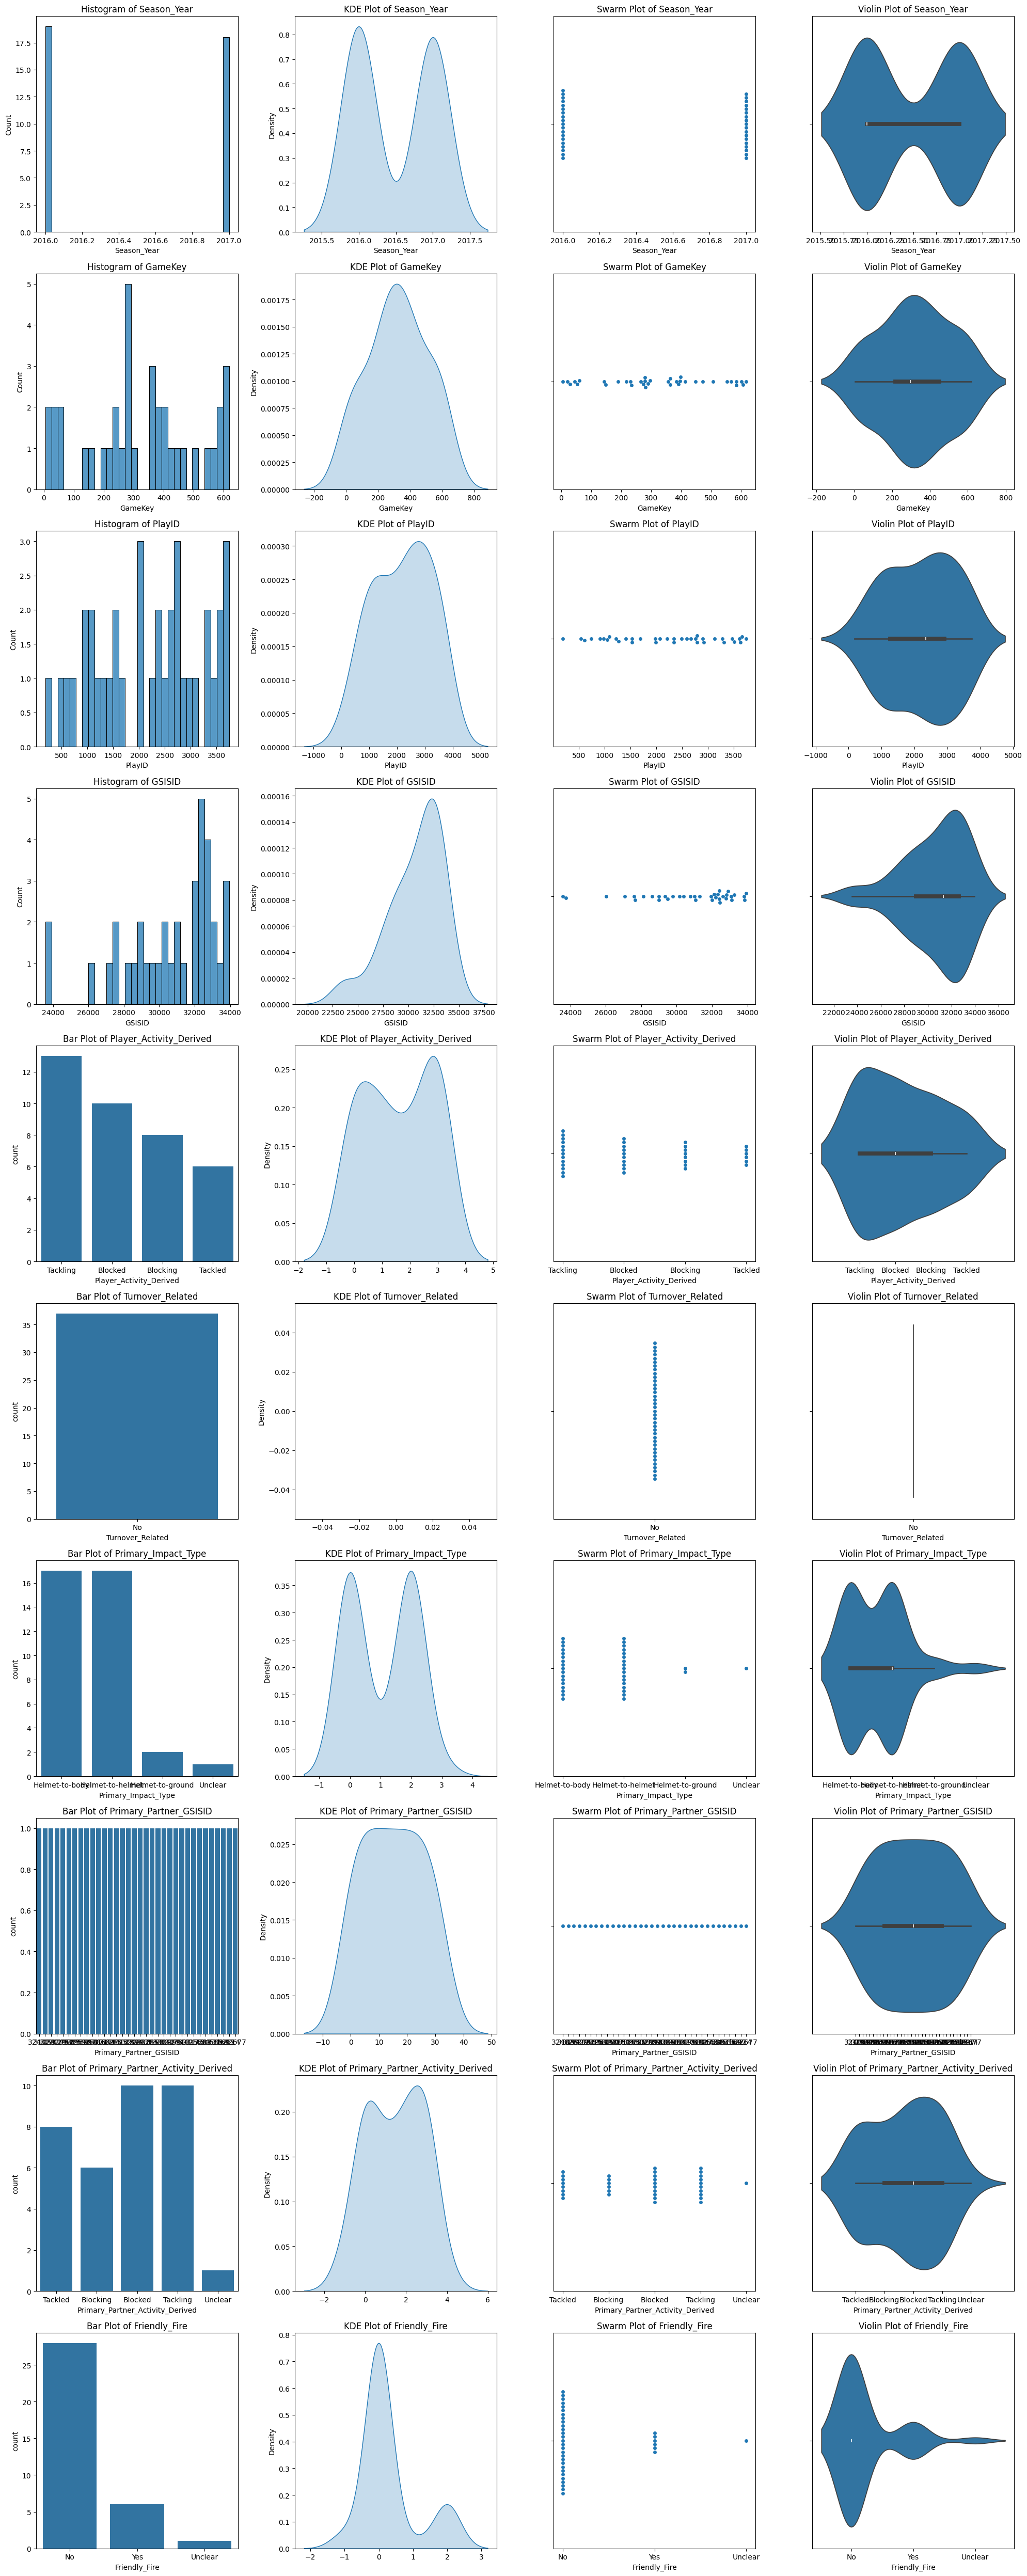

In [5]:
#  Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

num_rows = len(numeric_columns) + len(categorical_columns)
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

for idx, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=False, bins=30, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Histogram of {column}')
    
    sns.kdeplot(df[column], shade=True, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'KDE Plot of {column}')
    
    sns.swarmplot(x=df[column], ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Swarm Plot of {column}')
    
    sns.violinplot(x=df[column], ax=axes[idx, 3])
    axes[idx, 3].set_title(f'Violin Plot of {column}')

for idx, column in enumerate(categorical_columns, start=len(numeric_columns)):
    sns.countplot(x=df[column], ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Bar Plot of {column}')
    
    sns.kdeplot(df[column].astype("category").cat.codes, shade=True, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'KDE Plot of {column}')
    
    sns.swarmplot(x=df[column], ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Swarm Plot of {column}')
    
    sns.violinplot(x=df[column], ax=axes[idx, 3])
    axes[idx, 3].set_title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()


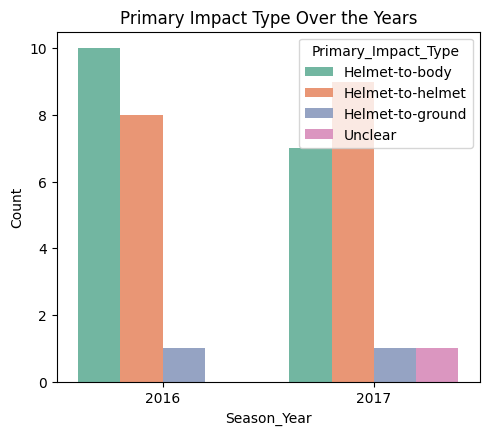

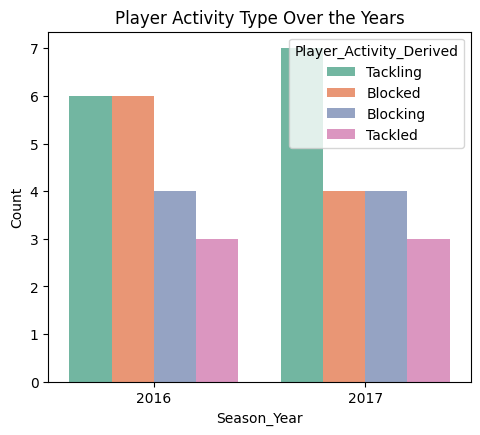

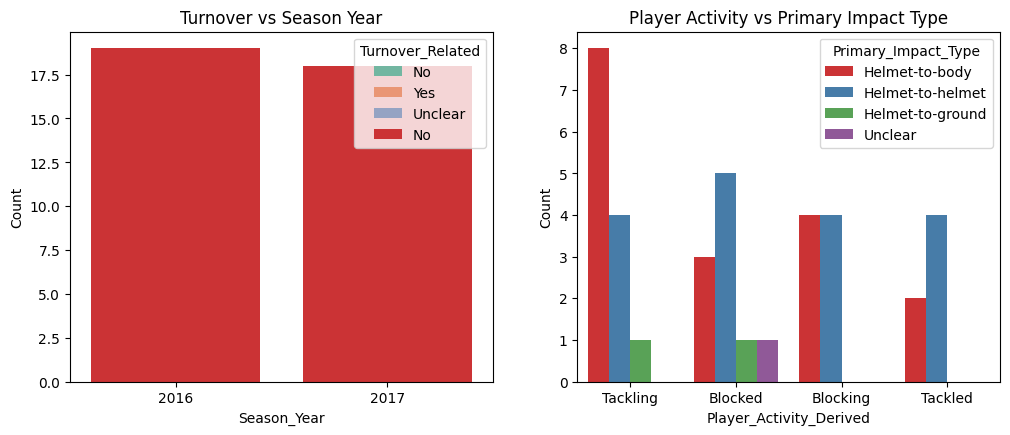

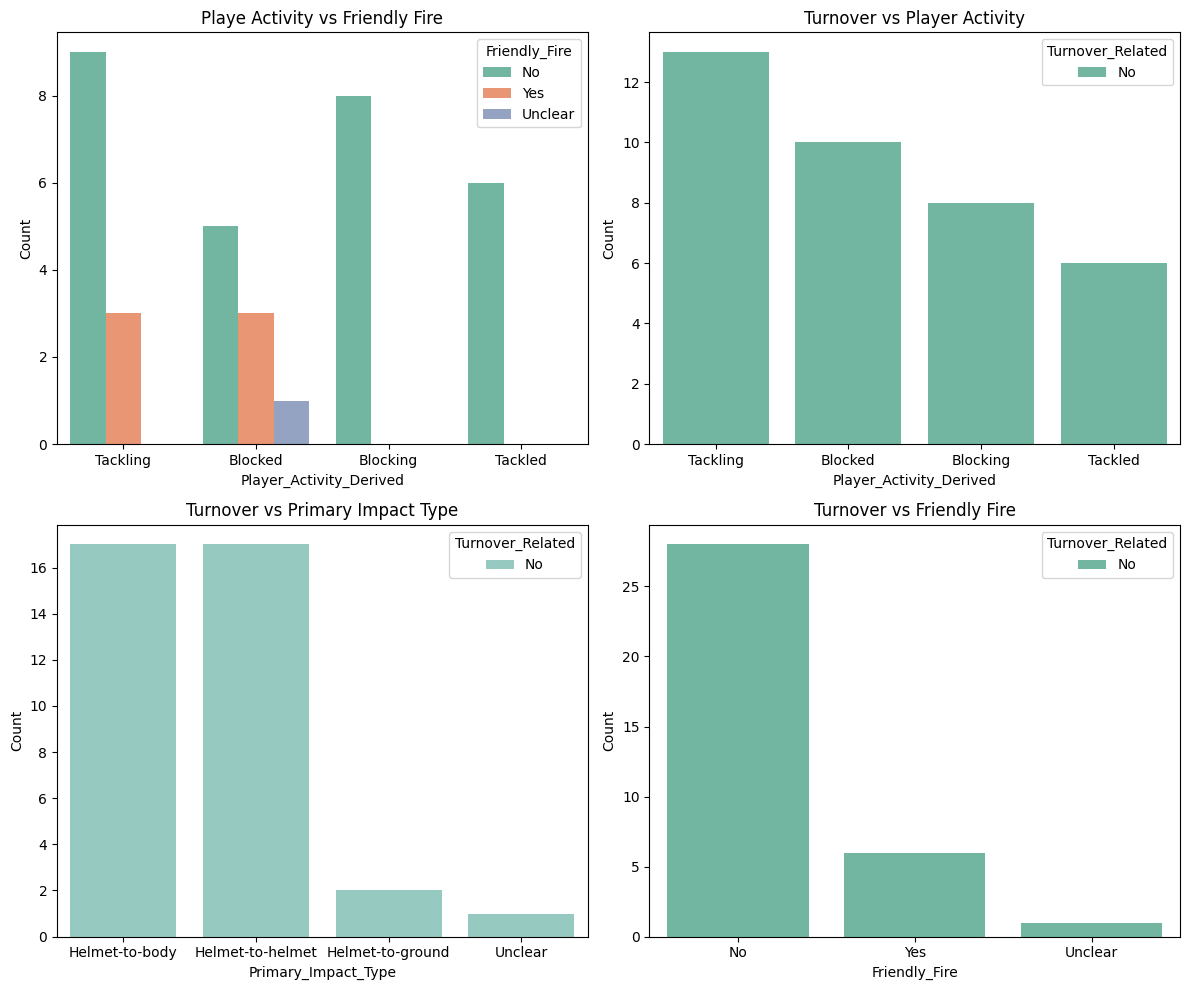

In [6]:
# Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Season_Year', hue='Primary_Impact_Type', palette='Set2')
plt.title('Primary Impact Type Over the Years')
plt.ylabel('Count')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Season_Year', hue='Player_Activity_Derived', palette='Set2')
plt.title('Player Activity Type Over the Years')
plt.ylabel('Count')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Season_Year', hue='Friendly_Fire', palette='Set2')
plt.title('Friendly Fire Over the Years')
plt.ylabel('Count')

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Season_Year', hue='Turnover_Related', palette='Set1')
plt.title('Turnover vs Season Year')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Player_Activity_Derived', hue='Primary_Impact_Type', palette='Set1')
plt.title('Player Activity vs Primary Impact Type')
plt.ylabel('Count')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Player_Activity_Derived', hue='Friendly_Fire', palette='Set2')
plt.title('Playe Activity vs Friendly Fire')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Player_Activity_Derived', hue='Turnover_Related', palette='Set2')
plt.title('Turnover vs Player Activity')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Primary_Impact_Type', hue='Turnover_Related', palette='Set3')
plt.title('Turnover vs Primary Impact Type')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Friendly_Fire', hue='Turnover_Related', palette='Set2')
plt.title('Turnover vs Friendly Fire')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


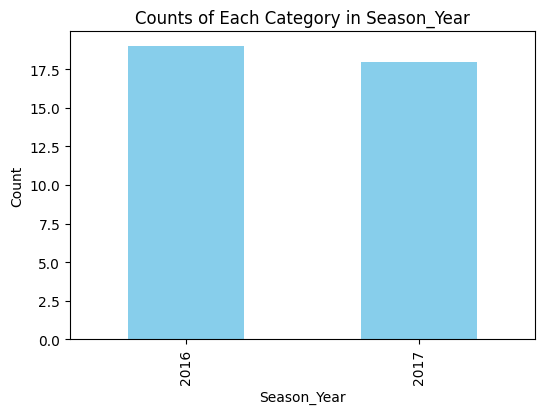

<Figure size 640x480 with 0 Axes>

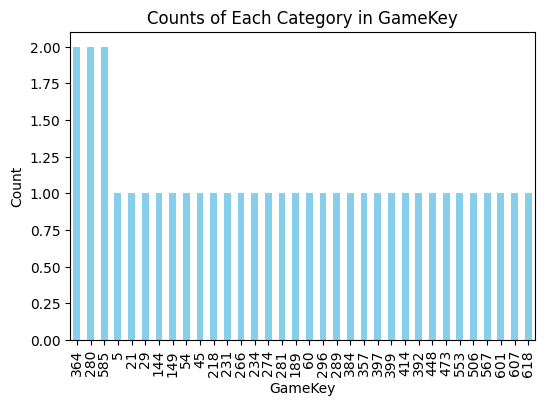

<Figure size 640x480 with 0 Axes>

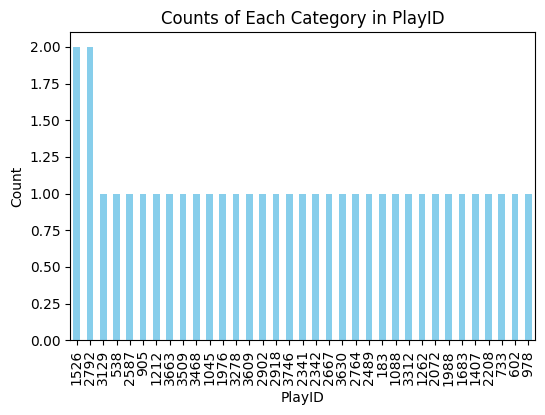

<Figure size 640x480 with 0 Axes>

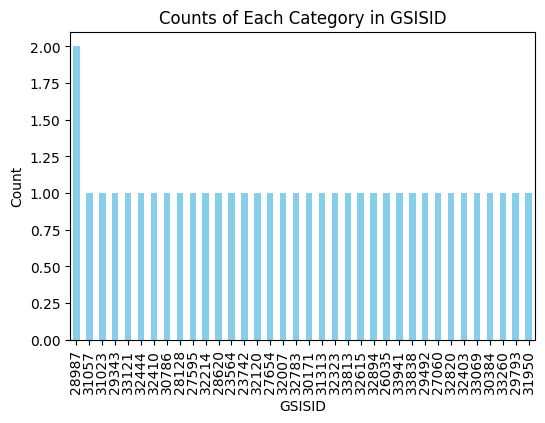

<Figure size 640x480 with 0 Axes>

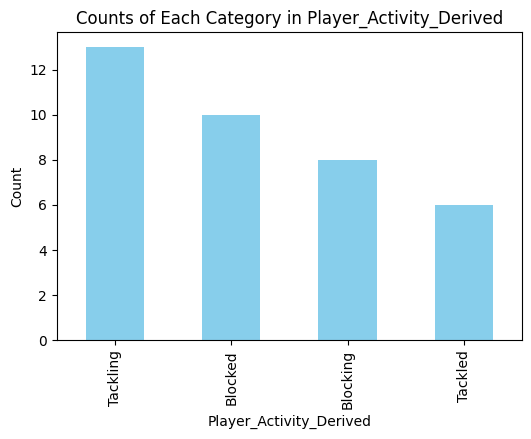

<Figure size 640x480 with 0 Axes>

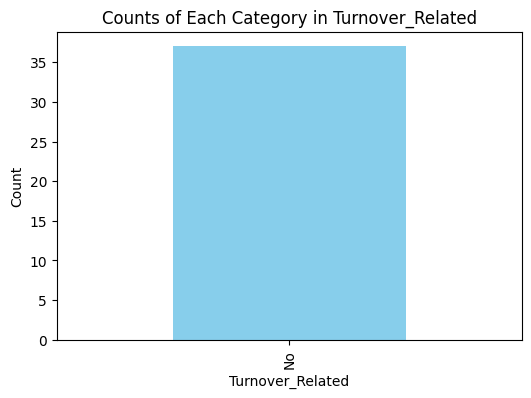

<Figure size 640x480 with 0 Axes>

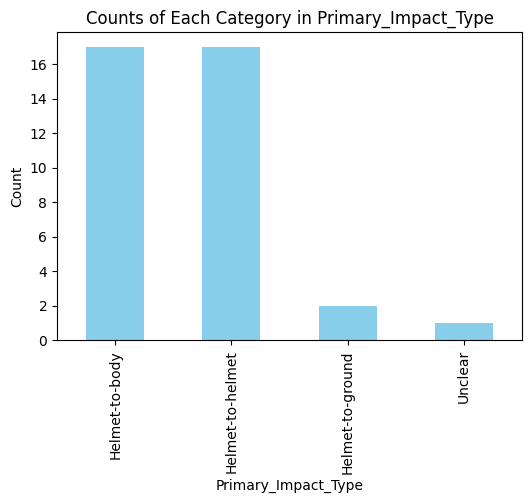

<Figure size 640x480 with 0 Axes>

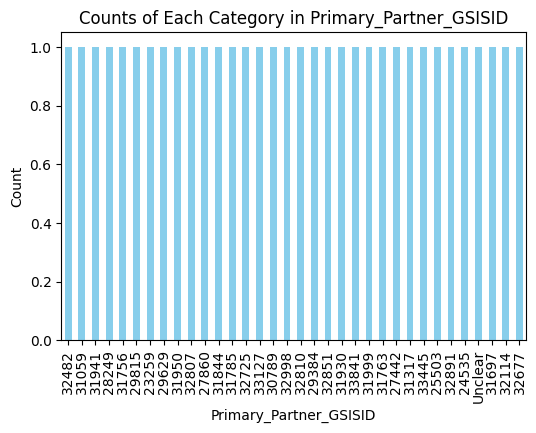

<Figure size 640x480 with 0 Axes>

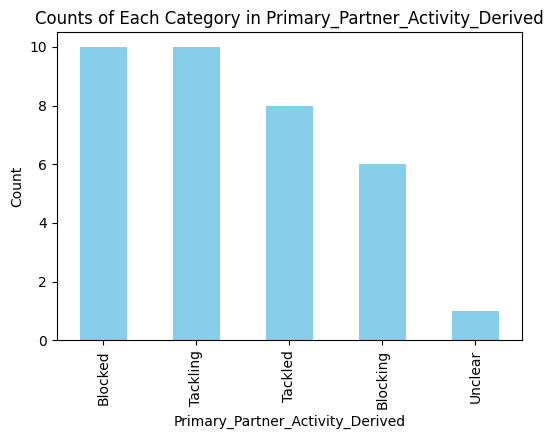

<Figure size 640x480 with 0 Axes>

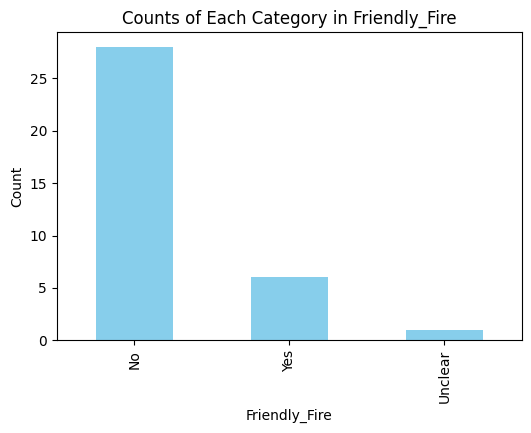

<Figure size 640x480 with 0 Axes>

In [7]:
# Draw a bar plot to indicate total counts of each categorical variable in a given column.


for column in df.columns:
    plt.figure(figsize=(6, 4))  
    value_counts = df[column].value_counts()  
    value_counts.plot(kind='bar', color='skyblue')
    
    plt.title(f'Counts of Each Category in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    plt.show()
    plt.tight_layout()




In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop rows with NaN
df = df.dropna()

# Drop rows with 'Unclear' in any categorical column
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    df = df[df[col].astype(str) != "Unclear"]

# Recompute categorical columns after filtering (in case some were removed)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
mean_numerical = df[numerical_cols].mean()
print("\nMean of Numerical Columns:")
print(mean_numerical)

# Encode categorical columns
encoders = {}
mean_categorical = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
    mean_categorical[col] = df[col + '_encoded'].mean()

print("\nMean of Categorical Columns (encoded):")
for col, mean_val in mean_categorical.items():
    print(f"{col}: {mean_val:.2f}")

print("\nLabel to numeric mapping per column:")
for col, le in encoders.items():
    print(f"\nColumn: {col}")
    for label, num in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {label} -> {num}")




Mean of Numerical Columns:
Season_Year                                  2016.454545
GameKey                                       310.181818
PlayID                                       2224.818182
GSISID                                      30708.696970
Player_Activity_Derived_encoded                 1.636364
Turnover_Related_encoded                        0.000000
Primary_Impact_Type_encoded                     0.484848
Primary_Partner_GSISID_encoded                 16.000000
Primary_Partner_Activity_Derived_encoded        1.484848
Friendly_Fire_encoded                           0.181818
dtype: float64

Mean of Categorical Columns (encoded):
Player_Activity_Derived: 1.64
Turnover_Related: 0.00
Primary_Impact_Type: 0.48
Primary_Partner_GSISID: 16.00
Primary_Partner_Activity_Derived: 1.48
Friendly_Fire: 0.18

Label to numeric mapping per column:

Column: Player_Activity_Derived
  Blocked -> 0
  Blocking -> 1
  Tackled -> 2
  Tackling -> 3

Column: Turnover_Related
  No -> 0

Column: P

In [68]:
# Find medians

numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

numeric_medians = df[numeric_columns].median()

print("Medians of columns:")
print(numeric_medians)



Medians of columns:
Season_Year                                  2016.0
GameKey                                       289.0
PlayID                                       2342.0
GSISID                                      31950.0
Player_Activity_Derived_encoded                 2.0
Turnover_Related_encoded                        0.0
Primary_Impact_Type_encoded                     0.0
Primary_Partner_GSISID_encoded                 16.0
Primary_Partner_Activity_Derived_encoded        2.0
Friendly_Fire_encoded                           0.0
dtype: float64


In [51]:
# Find modes

for col in df.columns:
    mode_value = df[col].mode()
    print(f"Mode of column '{col}': {mode_value.values}")


Mode of column 'Season_Year': [2016]
Mode of column 'GameKey': [280 364 585]
Mode of column 'PlayID': [1526 2792]
Mode of column 'GSISID': [28987]
Mode of column 'Player_Activity_Derived': ['Tackling']
Mode of column 'Turnover_Related': ['No']
Mode of column 'Primary_Impact_Type': ['Helmet-to-body' 'Helmet-to-helmet']
Mode of column 'Primary_Partner_GSISID': ['23259' '24535' '25503' '27442' '27860' '28249' '29384' '29629' '29815'
 '30789' '31059' '31317' '31697' '31756' '31763' '31785' '31844' '31930'
 '31941' '31950' '31999' '32114' '32482' '32677' '32725' '32807' '32810'
 '32851' '32891' '32998' '33127' '33445' '33841' 'Unclear']
Mode of column 'Primary_Partner_Activity_Derived': ['Blocked' 'Tackling']
Mode of column 'Friendly_Fire': ['No']
Mode of column 'Player_Activity_Derived_encoded': [3]
Mode of column 'Turnover_Related_encoded': [0]
Mode of column 'Primary_Impact_Type_encoded': [0 2]
Mode of column 'Primary_Partner_GSISID_encoded': [34]
Mode of column 'Primary_Partner_Activity

In [52]:
from sklearn.preprocessing import LabelEncoder

# Suppose you already fitted the encoder
le = LabelEncoder()
le.fit(df["Primary_Impact_Type"])  # original categories
df["Primary_Impact_Type_encoded"] = le.transform(df["Primary_Impact_Type"])

# To see the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)


{'Helmet-to-body': np.int64(0), 'Helmet-to-ground': np.int64(1), 'Helmet-to-helmet': np.int64(2), 'Unclear': np.int64(3)}


Most of the histograms follow a left or right skewed distribution or are a bimodal distribution, not following a normal distribution. There are minimal outliers with this dataset; a potential consideration could be the 'helment-to-ground' with the Primary_Impact_Type where there is only 2 instances of this activity. All the grouped histograms follow a right skewed distribution, meaning certain grouped data is more frequent than others. The minimum and maximum values of each histogram is the least frequent and most frequent values in each column. For example, the minimum value in the Player_Activity_Derived is tackled and the maximum value is tackling. Changing the bin size, has different effects on the histogram and it is important to find a balanced trade-off to reveal different features of the data like outlier, data shape, and distribution. For example, small bins will be more detailed, noisy, and have a high resolution while the large bins will smoother, less noisy, and have a lower resolution. 


In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df_concussion = pd.read_csv("Concussion Injuries 2012-2014 (1) (1).csv")

# Drop unnecessary columns and rows with NaNs
df_clean_concussion = df_concussion.drop(columns=['ID', 'Player', 'Game', 'Date', 'Winning Team?', 'Unknown Injury?'])
df_clean_concussion = df_clean_concussion.dropna()

# Identify true categorical columns
categorical_cols = df_clean_concussion.select_dtypes(include=['object']).columns.tolist()

# Encode only categorical columns
encoders = {}
mappings = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean_concussion[col + "_encoded"] = le.fit_transform(df_clean_concussion[col].astype(str))
    encoders[col] = le
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Numeric columns stay numeric
numeric_cols = df_clean_concussion.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Combine numeric columns and encoded categorical columns
X_concussion = df_clean_concussion[numeric_cols + [col + "_encoded" for col in categorical_cols]]

# Print mappings for all encoded categorical columns
for col, mapping in mappings.items():
    print(f"Encoded values for '{col}':")
    for category, code in mapping.items():
        print(f"  {code} -> {category}")
    print()


Encoded values for 'Team':
  0 -> Arizona Cardinals
  1 -> Atlanta Falcons
  2 -> Baltimore Ravens
  3 -> Buffalo Bills
  4 -> Carolina Panthers
  5 -> Chicago Bears
  6 -> Cincinnati Bengals
  7 -> Cleveland Browns
  8 -> Dallas Cowboys
  9 -> Denver Broncos
  10 -> Detroit Lions
  11 -> Green Bay Packers
  12 -> Houston Texans
  13 -> Indianapolis Colts
  14 -> Jacksonville Jaguars
  15 -> Kansas City Chiefs
  16 -> Miami Dolphins
  17 -> Minnesota Vikings
  18 -> New England Patriots
  19 -> New Orleans Saints
  20 -> New York Giants
  21 -> New York Jets
  22 -> Oakland Raiders
  23 -> Philadelphia Eagles
  24 -> Pittsburgh Steelers
  25 -> San Diego Chargers
  26 -> San Francisco 49ers
  27 -> Seattle Seahawks
  28 -> St. Louis Rams
  29 -> Tampa Bay Buccaneers
  30 -> Tennessee Titans
  31 -> Washington Redskins

Encoded values for 'Opposing Team':
  0 -> Arizona Cardinals
  1 -> Atlanta Falcons
  2 -> Baltimore Ravens
  3 -> Buffalo Bills
  4 -> Carolina Panthers
  5 -> Chicago 

In [64]:
# Compute meaningful summary stats on raw data
summary_stats = pd.DataFrame({
    'Count': X_concussion.count(),
    'Mean': X_concussion.mean(),
    'Median': X_concussion.median(),
    'Mode': X_concussion.mode().iloc[0],  # first mode if multiple
    'Min': X_concussion.min(),
    'Max': X_concussion.max()
})

print(summary_stats)



                                        Count        Mean  Median   Mode  Min  \
Week of Injury                            325    9.578462    10.0   12.0  1.0   
Weeks Injured                             325    1.000000     1.0    1.0  1.0   
Games Missed                              325    0.923077     0.0    0.0  0.0   
Total Snaps                               325   33.070769    30.0   17.0  0.0   
Team_encoded                              325   16.040000    15.0   14.0  0.0   
Opposing Team_encoded                     325   15.535385    15.0    5.0  0.0   
Position_encoded                          325    6.941538     8.0    1.0  0.0   
Pre-Season Injury?_encoded                325    0.000000     0.0    0.0  0.0   
Season_encoded                            325    0.670769     1.0    0.0  0.0   
Reported Injury Type_encoded              325    0.184615     0.0    0.0  0.0   
Play Time After Injury_encoded            325   47.227692    49.0   88.0  0.0   
Average Playtime Before Inju

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
injury_df = pd.read_csv("InjuryRecord.csv")

# Fix dtypes: try converting object columns that look numeric into numbers
for col in injury_df.columns:
    if injury_df[col].dtype == "object":
        # If column can be safely converted to numbers, do it
        try:
            injury_df[col] = pd.to_numeric(injury_df[col])
        except ValueError:
            pass  # leave as object if not numeric

# Encode ONLY categorical columns
encoders = {}
categorical_cols = injury_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    injury_df[col + "_encoded"] = le.fit_transform(injury_df[col].astype(str))
    encoders[col] = le

# Get all numeric columns (original + encoded)
all_cols = injury_df.select_dtypes(include=['number']).columns

# Summary stats
summary_stats = pd.DataFrame({
    "Count": injury_df[all_cols].count(),
    "Mean": injury_df[all_cols].mean(),
    "Median": injury_df[all_cols].median(),
    "Mode": injury_df[all_cols].mode().iloc[0],
    "Min": injury_df[all_cols].min(),
    "Max": injury_df[all_cols].max()
})

print("\n--- Summary Statistics ---")
print(summary_stats)

# Show mapping for categorical columns
for col, le in encoders.items():
    print(f"\nEncoded values for '{col}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))



--- Summary Statistics ---
                  Count          Mean   Median     Mode    Min    Max
PlayerKey           105  42283.609524  43518.0  33337.0  31070  47813
DM_M1               105      1.000000      1.0      1.0      1      1
DM_M7               105      0.723810      1.0      1.0      0      1
DM_M28              105      0.352381      0.0      0.0      0      1
DM_M42              105      0.276190      0.0      0.0      0      1
GameID_encoded      105     51.961905     52.0    100.0      0    103
PlayKey_encoded     105     48.095238     52.0     76.0      0     76
BodyPart_encoded    105      1.723810      3.0      3.0      0      4
Surface_encoded     105      0.542857      1.0      1.0      0      1

Encoded values for 'GameID':
{'31070-3': np.int64(0), '31933-20': np.int64(1), '33337-2': np.int64(2), '33337-8': np.int64(3), '33474-19': np.int64(4), '34347-5': np.int64(5), '35570-15': np.int64(6), '35611-7': np.int64(7), '35648-12': np.int64(8), '36557-1': np.int64(9

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

NameError: name 'bars' is not defined

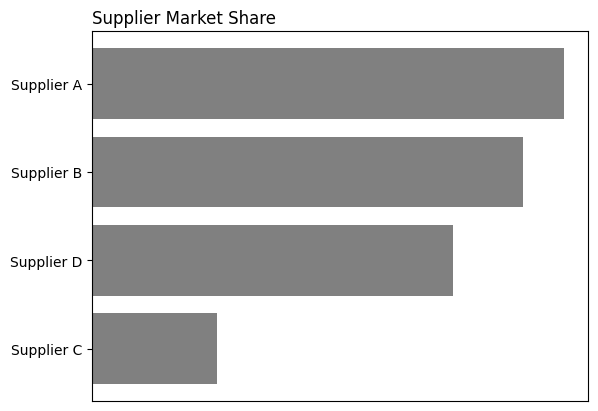

In [11]:
import matplotlib.pyplot as plt

categories = ['Supplier A', 'Supplier B', 'Supplier C', 'Supplier D']
values = [34, 31, 9, 26]

total = sum(values)
percentages = [(value / total) * 100 for value in values]

sorted_values, sorted_categories = zip(*sorted(zip(values, categories), reverse=False))

plt.barh(sorted_categories, sorted_values, color='grey')

plt.title("Supplier Market Share", loc='left')
plt.xticks([])

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', ha='right', color='white')

plt.subplots_adjust(bottom=0.1)

ax.plot([0, max(market_share) + 5], [-1.5, -1.5], color='gray', linewidth=0.5)
plt.text(0, -1.5, 'Total', ha='left', va='center', fontsize=10)
plt.text(max(market_share) + 2, -1.5, '100%', ha='left', va='center', fontsize=10)


plt.show()
